# Import libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

In [19]:
# Load uploaded CSV file to inspect its structure
file_path = 'dly518.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset
data.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-sep-1945,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,...,0,27,1.6,0,,1.6,2.3,,,
1,02-sep-1945,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,...,0,16,9.3,0,,2.5,3.5,,,
2,03-sep-1945,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,...,0,12,11.4,0,,2.9,3.9,,,
3,04-sep-1945,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,...,0,18,5.3,0,,2.0,2.7,,,
4,05-sep-1945,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,...,0,13,3.6,0,,1.8,2.4,,,


# Display basic information

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28916 entries, 0 to 28915
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    28916 non-null  object 
 1   ind     28916 non-null  int64  
 2   maxtp   28916 non-null  float64
 3   ind.1   28916 non-null  int64  
 4   mintp   28916 non-null  float64
 5   igmin   28916 non-null  object 
 6   gmin    28916 non-null  object 
 7   ind.2   28916 non-null  int64  
 8   rain    28916 non-null  float64
 9   cbl     28916 non-null  float64
 10  wdsp    28916 non-null  float64
 11  ind.3   28916 non-null  int64  
 12  hm      28916 non-null  int64  
 13  ind.4   28916 non-null  int64  
 14  ddhm    28916 non-null  int64  
 15  ind.5   28916 non-null  int64  
 16  hg      28916 non-null  int64  
 17  sun     28916 non-null  float64
 18  dos     28916 non-null  object 
 19  soil    28916 non-null  object 
 20  pe      28916 non-null  object 
 21  evap    28916 non-null  object 
 22

# Cleaning data

In [21]:
# Step 1: Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')

In [22]:
# Replace invalid strings with NaN and convert specific columns to numeric where applicable
cols_to_convert = ['igmin', 'gmin', 'smd_wd', 'smd_md', 'smd_pd']
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [23]:
# Dropping rows with missing dates as they are essential
data = data.dropna(subset=['date'])

In [24]:
# For other columns, fill missing values with the column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

In [25]:
# Optionally drop irrelevant or duplicate columns (if required)
irrelevant_columns = ['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4', 'ind.5', 'hg', 'dos', 'soil', 'pe', 'evap']
data.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

In [26]:
# Display cleaned data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28916 entries, 0 to 28915
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    28916 non-null  datetime64[ns]
 1   maxtp   28916 non-null  float64       
 2   mintp   28916 non-null  float64       
 3   igmin   28916 non-null  float64       
 4   gmin    28916 non-null  float64       
 5   rain    28916 non-null  float64       
 6   cbl     28916 non-null  float64       
 7   wdsp    28916 non-null  float64       
 8   hm      28916 non-null  int64         
 9   ddhm    28916 non-null  int64         
 10  sun     28916 non-null  float64       
 11  smd_wd  28916 non-null  float64       
 12  smd_md  28916 non-null  float64       
 13  smd_pd  28916 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 3.1 MB


In [27]:
data.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,sun,smd_wd,smd_md,smd_pd
0,1945-09-01,19.2,14.4,0.0,13.6,0.2,1013.8,12.0,20,90,1.6,12.407409,11.154684,7.519124
1,1945-09-02,20.7,14.8,0.0,13.4,0.0,1018.2,7.3,12,100,9.3,12.407409,11.154684,7.519124
2,1945-09-03,23.3,11.8,0.0,9.6,0.0,1021.2,4.2,8,100,11.4,12.407409,11.154684,7.519124
3,1945-09-04,21.6,9.4,0.0,6.7,0.0,1024.2,6.2,13,310,5.3,12.407409,11.154684,7.519124
4,1945-09-05,21.3,12.2,0.0,11.3,0.0,1024.9,4.9,9,100,3.6,12.407409,11.154684,7.519124


In [28]:
# Save the cleaned data for further analysis
cleaned_file_path = 'cleaned_dly518.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: cleaned_dly518.csv


In [29]:
# Convert date column to datetime for proper time-series plotting
data['date'] = pd.to_datetime(data['date'])

# Create plotting

In [30]:
# Set the style for plots
sns.set_theme(style="whitegrid")

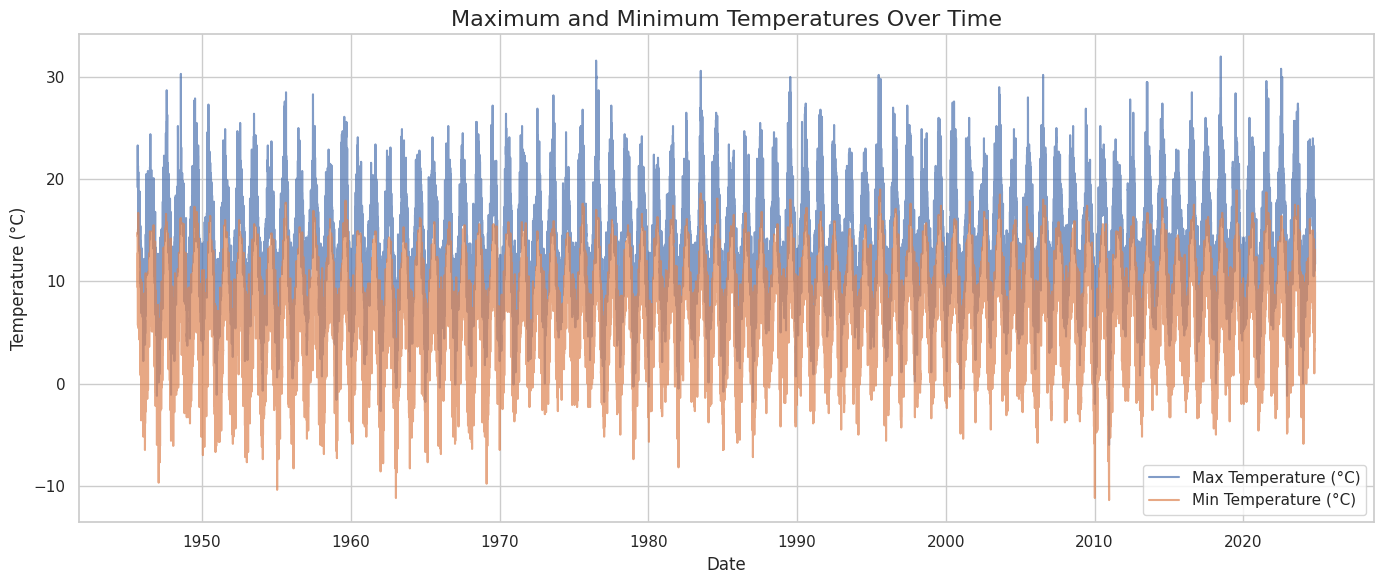

In [31]:
# Plot 1: Time-Series Plot for Maximum and Minimum Temperatures
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['maxtp'], label='Max Temperature (°C)', alpha=0.7)
plt.plot(data['date'], data['mintp'], label='Min Temperature (°C)', alpha=0.7)
plt.title('Maximum and Minimum Temperatures Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

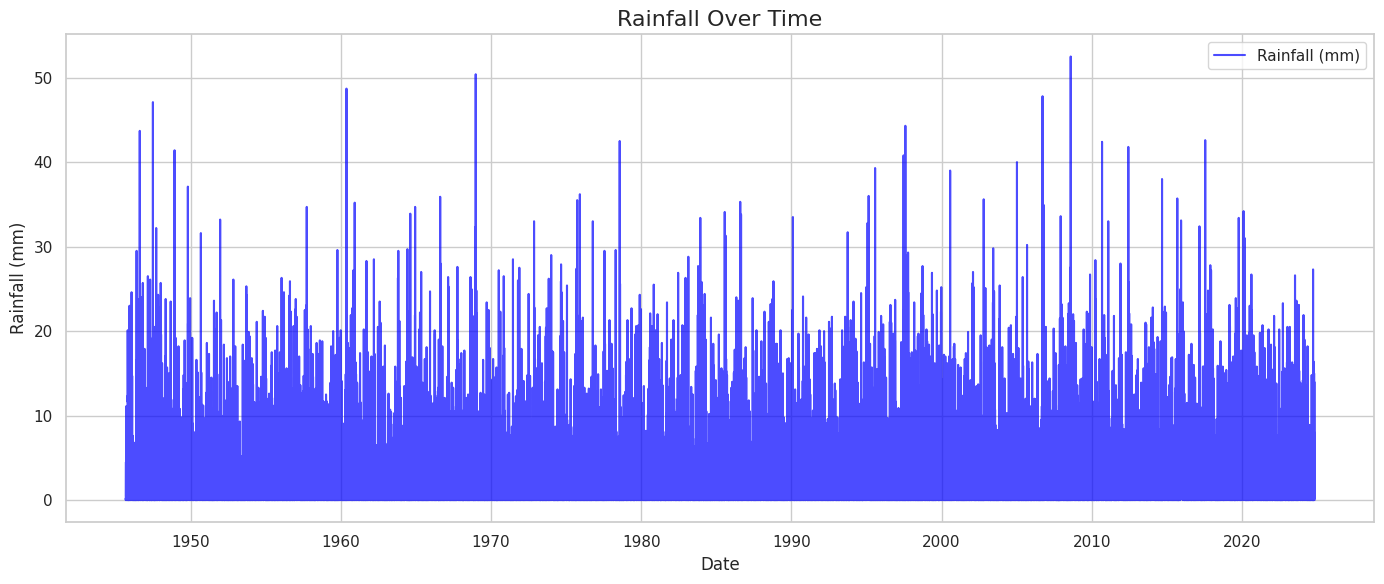

In [32]:
# Plot 2: Time-Series Plot for Rainfall
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['rain'], label='Rainfall (mm)', color='blue', alpha=0.7)
plt.title('Rainfall Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

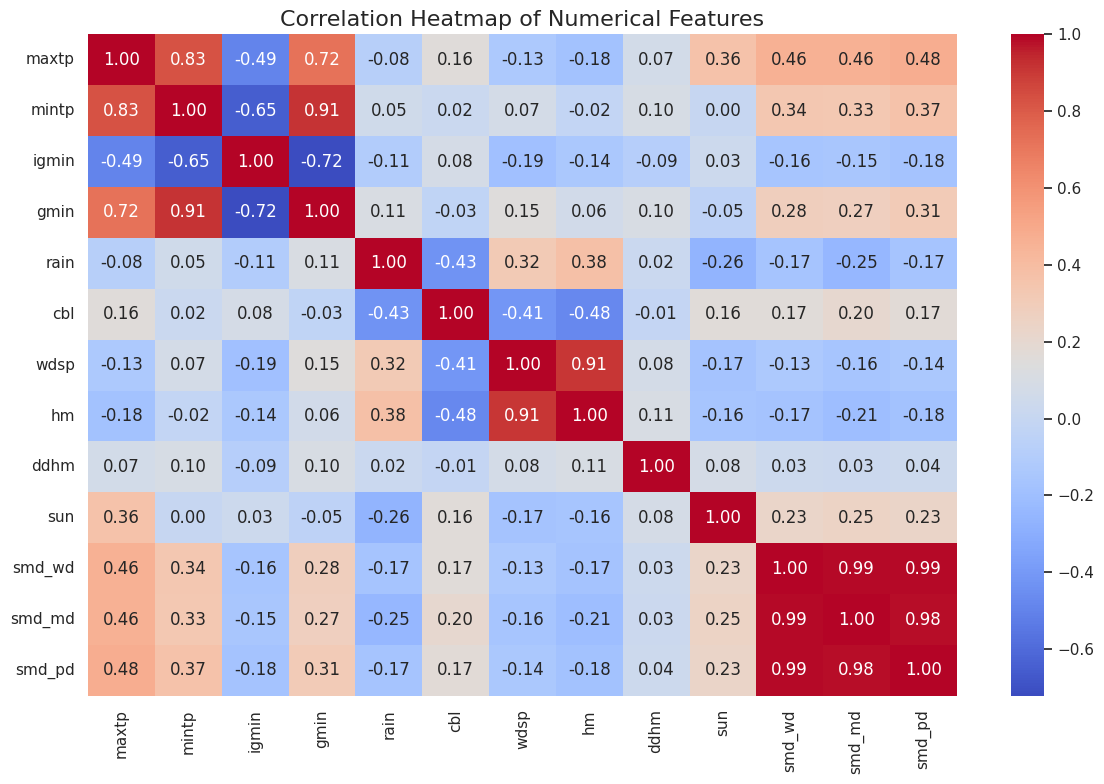

In [33]:
# Plot 3: Correlation Heatmap
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

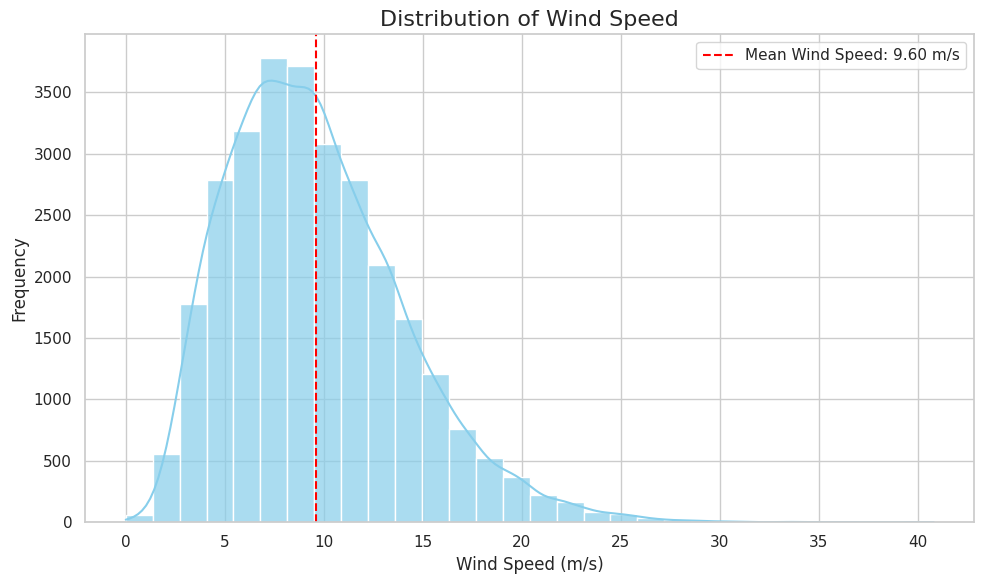

In [ ]:
# Plot 4: Histogram of Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['wdsp'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.axvline(data['wdsp'].mean(), color='red', linestyle='--', label=f'Mean Wind Speed: {data["wdsp"].mean():.2f} m/s')
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

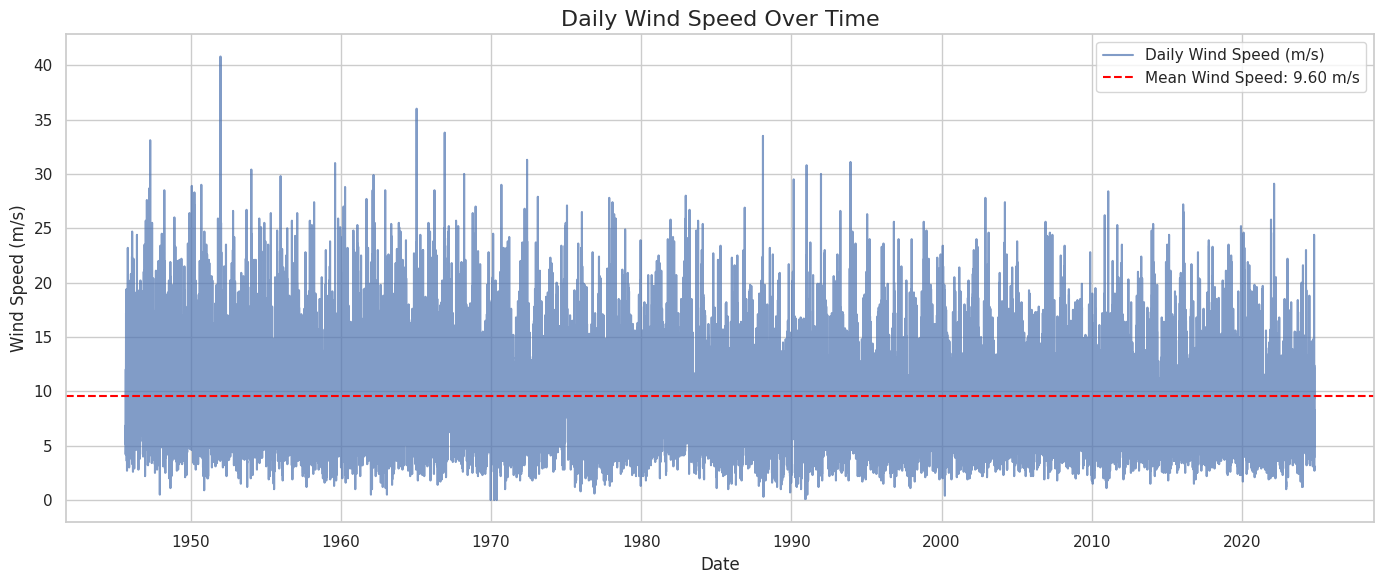

In [35]:
# Plot 5: Time-Series Plot for Wind Speed with Mean Line
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['wdsp'], label='Daily Wind Speed (m/s)', alpha=0.7)
plt.axhline(data['wdsp'].mean(), color='red', linestyle='--', label=f'Mean Wind Speed: {data["wdsp"].mean():.2f} m/s')
plt.title('Daily Wind Speed Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Extract Month from Date for Grouped Analysis
data['month'] = data['date'].dt.month

/tmp/ipykernel_7089/3685012920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='wdsp', data=data, palette='coolwarm')


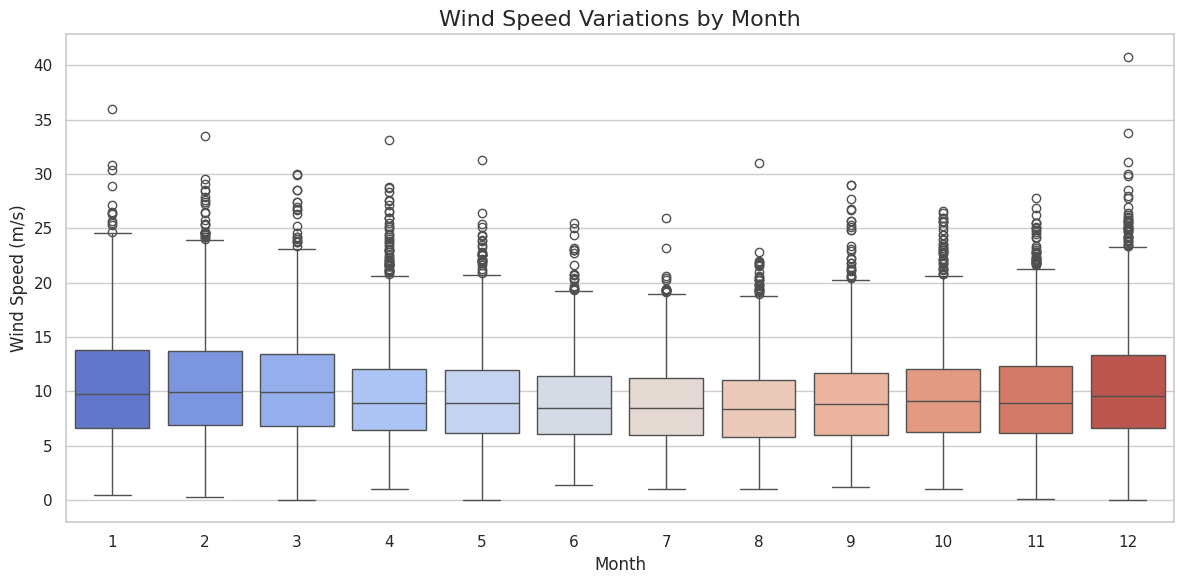

In [38]:
# Plot 6: Boxplot of Wind Speed by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='wdsp', data=data, palette='coolwarm')
plt.title('Wind Speed Variations by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.tight_layout()
plt.show()